In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
# Output is purchased column
# User id is to be ignored to be taken as an input or an aspect of dependency of purchase as user id is just a random number
# Input : Age and estimated salary

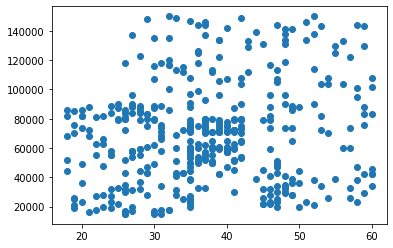

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['EstimatedSalary'])
plt.show()

In [6]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [40]:
(257/400)*100

64.25

In [41]:
(143/400)*100

35.75

In [7]:
p_df = df[df['Purchased']==1]
np_df = df[df['Purchased']==0]

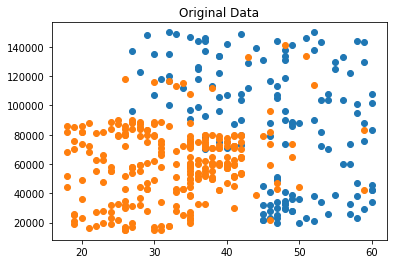

In [8]:
plt.scatter(p_df['Age'] , p_df['EstimatedSalary'])
plt.scatter(np_df['Age'] , np_df['EstimatedSalary'])
plt.title('Original Data')
plt.show()

In [9]:
x = df.iloc[:,2:4].values
y = df.iloc[:,4].values

In [10]:
# Splitting the data into Train and  Test --
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [11]:
print(x_train[0:5])

[[    57 122000]
 [    39  71000]
 [    47  25000]
 [    24  19000]
 [    36  50000]]


In [12]:
# The predicted value seems to be biased towards showing 0 as a result. This is because the range of "Age" and "EstimatedSalary"
# is very discete from each other.
# Hence we need to normalise both the ranges down to the range of (0 to 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# no need to apply fit in test

In [14]:
print(x_train[0:5])

[[0.92857143 0.79259259]
 [0.5        0.41481481]
 [0.69047619 0.07407407]
 [0.14285714 0.02962963]
 [0.42857143 0.25925926]]


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
print(x_train.shape)
print(x_test.shape)
# Default splitting of data for test and trai is 25:75

(300, 2)
(100, 2)


In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

In [18]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [19]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [22]:
# Accuracy = (62+25)/(62+12+1+25)

In [23]:
(62+25)/(62+12+1+25)

0.87

In [24]:
accuracy_score(y_pred,y_test)

0.87

In [25]:
# Predict for single values
clf.predict([[19 , 76000]])

array([1])

In [26]:
clf.predict([[51 , 23000]])

array([1])

In [27]:
# The machine is again giving biased result as *1* , this is because the age and salary have very distinct range.
# Hence we need to bring them under the range of (0 to 1) 
op = [[51, 23000]]
op = scaler.transform(op)
clf.predict(op)

array([0])

In [28]:
# Plot a decision region

In [29]:
!pip install mlxtend==0.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [30]:
import mlxtend
mlxtend.__version__

'0.19.0'

In [31]:
from mlxtend.plotting import plot_decision_regions

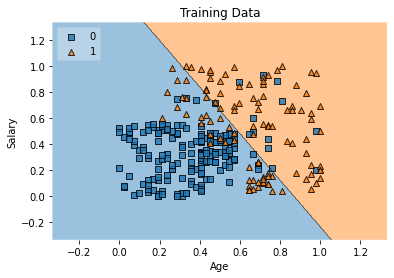

In [32]:
# Plotting decision regions
plot_decision_regions(x_train, y_train , clf , legend=2 , zoom_factor=3)                      

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Training Data')
plt.show()

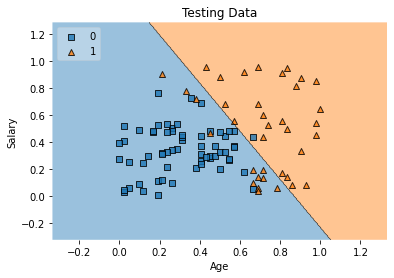

In [33]:
# Plotting decision regions
plot_decision_regions(x_test, y_test , clf , legend=2 , zoom_factor=3)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Testing Data')
plt.show()

In [34]:
# to increase the size of graph , use the code * zoom_factor= * 

In [35]:
# Probabilities

In [36]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [37]:
clf.predict_proba(x_test)
# the factor which has higher probability is considered to be the outcome.

array([[0.69253784, 0.30746216],
       [0.12791454, 0.87208546],
       [0.91620662, 0.08379338],
       [0.29978997, 0.70021003],
       [0.93028939, 0.06971061],
       [0.86047696, 0.13952304],
       [0.27879648, 0.72120352],
       [0.82096332, 0.17903668],
       [0.61103403, 0.38896597],
       [0.60416961, 0.39583039],
       [0.76913597, 0.23086403],
       [0.44976191, 0.55023809],
       [0.94643195, 0.05356805],
       [0.97568027, 0.02431973],
       [0.79144976, 0.20855024],
       [0.59103782, 0.40896218],
       [0.45814466, 0.54185534],
       [0.450667  , 0.549333  ],
       [0.76925761, 0.23074239],
       [0.26092699, 0.73907301],
       [0.96742635, 0.03257365],
       [0.8293682 , 0.1706318 ],
       [0.66397927, 0.33602073],
       [0.15624312, 0.84375688],
       [0.97978777, 0.02021223],
       [0.55849055, 0.44150945],
       [0.53283437, 0.46716563],
       [0.77091638, 0.22908362],
       [0.10045946, 0.89954054],
       [0.97900397, 0.02099603],
       [0.

In [42]:
# NOTE : If dataset is not balanced then accuracy score is not a good measure for evaluation.
# In such case rely on Recall or Precision.

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [21]:
confusion_matrix(y_pred,y_test)

array([[62, 12],
       [ 1, 25]])

In [43]:
# Precision : It is the ratio between true positive and all positives OR true negatives and all negatives.

# P_1 = TP/(TP+FP)
# P_0 = TN/(TN+FN)

In [46]:
from sklearn.metrics import precision_score
p_p = precision_score(y_pred , y_test , pos_label = 1)
p_p

0.6756756756756757

In [50]:
25/(25+12)

0.6756756756756757

In [49]:
p_n = precision_score(y_pred , y_test , pos_label = 0)
p_n

0.9841269841269841

In [51]:
62/(62+1)

0.9841269841269841

In [52]:
# Recall : Dealing with Sensitive Data(Healthcare)

# r_p = TP/(TP+FN)
# r_n = NP/(TN+FP)

In [54]:
from sklearn.metrics import recall_score
r_p = recall_score(y_pred , y_test , pos_label = 1)
r_p

0.9615384615384616

In [55]:
r_n = recall_score(y_pred , y_test , pos_label = 0)
r_n

0.8378378378378378